# [Alberi di Decisione](https://scikit-learn.org/stable/api/sklearn.tree.html)

Come avete visto a lezione gli alberi di decisione sono dei predittori versatili da utilizzare per problemi supervisionati sia di classificazione che di regressione.

In Python una buona implementazione degli alberi decisionali la troviamo nel sottomodulo `tree` del pacchetto `sklearn` (scikit-learn) che abbiamo già introdotto.

Per cominciare importiamo un po' di cose utili

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

Carichiamo il dataset `breat_cancer` che contiene dati su tumori ai polmoni suddivisi in benigni e maligni per un certo numero di pazienti.

In [2]:
breast = load_breast_cancer()

Creiamo un `DataFrame` con pandas

In [3]:
data = pd.DataFrame(breast['data'], columns = breast['feature_names'])
# Aggiungiamo la colonna target
data['target'] = breast['target']
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


Bene ora il nostro obbiettivo è quello di utilizzare un albero di classificazione per prevedere la variabile target (ovvero l'esito del tumore) in funzione delle 30 variabili esplicative da `mean radius` a `worst fractal dimension`.

In [4]:
len(data)

569

Abbiamo 569 osservazioni suddivise in 2 classi (0 sta per maligno mentre 1 per benigno).

In [5]:
data["target"].value_counts()

target
1    357
0    212
Name: count, dtype: int64

Per valutare correttamente i risultati dei modelli che andremo ad istanziare dividiamo il dataset in training set e test set. In questo esempio il dataset non è grandissimo quindi la tecnica dello splitting potrebbe non essere la più indicata ma cominciamo comunque così.

Per eseguire lo splitting abbiamo a disposizione la funzione `train_test_split` di sklearn

In [6]:
X = data.loc[:, data.columns != 'target'] # tutte le colonne meno il target
y = data["target"]
p = 0.25 # Vogliamo un test set che sia il 25% del totale
         # che è anche il valore che si ottiene senza
         # specificare nulla
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = p, 
                                                    random_state = 0) 


In [7]:
print(X_train.shape, X_test.shape)

(426, 30) (143, 30)


Abbiamo così suddiviso le osservazioni in 426 di training e 143 di test

Ora possiamo creare il nostro albero di classificazione:

In [25]:
albero = DecisionTreeClassifier(criterion = "gini", # Il criterio per suddividere
                                                    # un nodo "gini" o "entropy"
                                splitter = "best",  # Come selezionare la variabile
                                                    # su cui splittare, "best" per quella
                                                    # che porta alla massima riduzione del criterio
                                                    # "random" per casuale.
                                max_depth = None,      # Altezza massima dell'albero
                                min_samples_split = 2, # Numero minimo di ossevazioni in un nodo
                                                       # perché sia splittato
                                min_samples_leaf = 15, # Numero minimo di osservazioni in un nodo foglia
                                random_state = 0)

Alleniamo l'albero usando i dati di training:

In [26]:
albero.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=15, random_state=0)

Per visualizzare l'albero che è stato appreso usiamo la funzione `plot_tree`

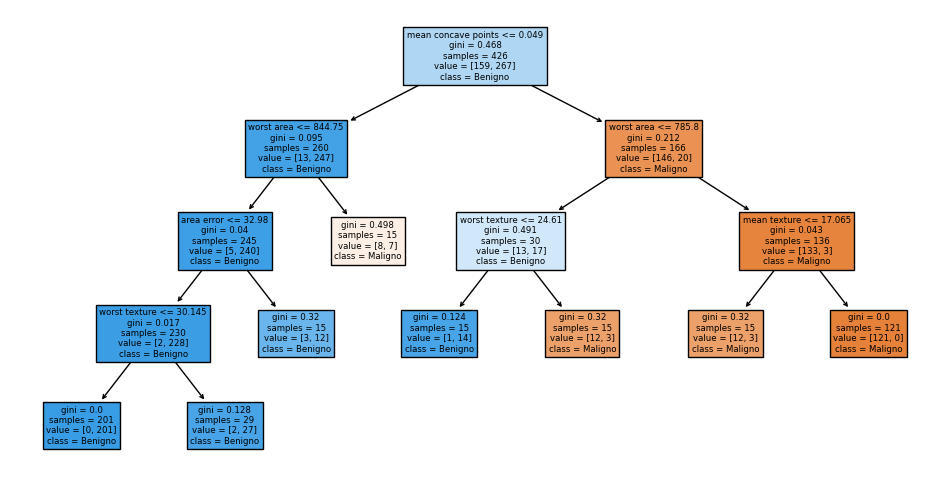

In [27]:
plt.figure(figsize = (12, 6))
plot_tree(albero, 
          filled = True,  # Se colorare i nodi in base alle classi
          feature_names = data.columns,
          class_names = ["Maligno", "Benigno"])
plt.show()

Otteniamo un albero di altezza 4 con 8 nodi foglia. Alla fine solo 2 delle 9 foglie sono pure (contengono osservazioni tutte di una stessa classe) metre 6 portebbero essere splittate ancora, ciò però non accade poiché abbiamo settato `min_samples_leaf` a 15 quindi, splittando ancora, i nodi conterrebbero meno di 15 osservazioni.

Valutiamo le performance del classificatore sia su training che test set, il metodo `score` valuta l'accuratezza del classificatore su un dataset.

In [28]:
albero.score(X_train, y_train)

0.9553990610328639

Dal plot di prima vediamo che le osservazioni mal classificate sono 2 nella seconda foglia, 3 nella terza, 7 nella quarta, 1 nella quinta, 3 nella sesta e 3 nella settima. Pertanto l'albero sbaglia 19 osservazioni su 426 e quindi la sua accuratezza risulta:

In [29]:
1 - 19/426

0.9553990610328639

Questo è il valore di accuratezza sul training set, che ci aspettavamo alto, vediamo ora sul test set

In [30]:
albero.score(X_test, y_test)

0.9230769230769231

Sempre piuttosto alto e molto vicino al valore di training, quindi siamo abbastanza sicuri che in questo caso il metodo non abbia prodotto overfitting, nel qual caso l'accuratezza di test avrebbe dovuto avere un valore molto più basso di quella di train.

La tecnica di imporre un numero massimo di osservazioni in ogni foglia è una tecnica utile per ridurre l'overfitting poiché in questo modo l'albero non può splittare troppo le foglie e diventare eccessivamente complesso.

Proviamo a ripetere l'analisi senza porre questo limite.

In [147]:
albero = DecisionTreeClassifier(criterion = "gini", 
                                splitter = "best",
                                random_state = 0)

In [148]:
albero.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

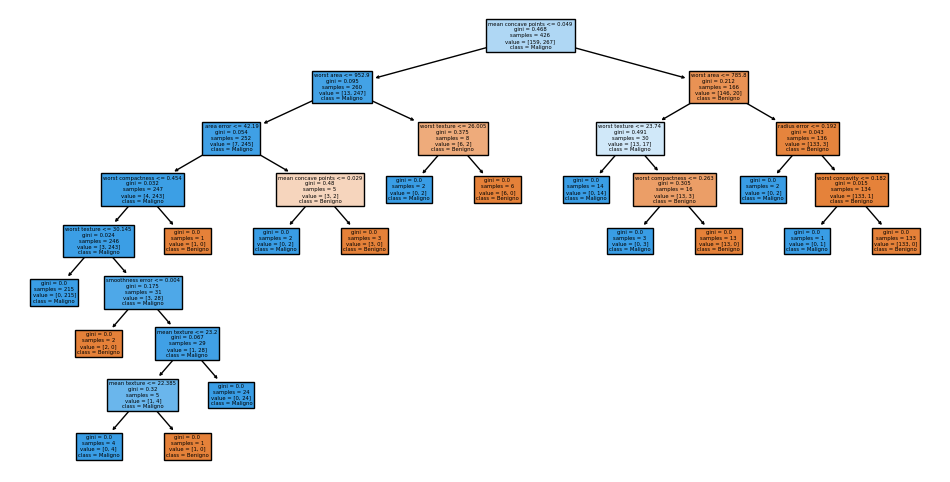

In [149]:
plt.figure(figsize = (12, 6))
plot_tree(albero, 
          filled = True,  # Se colorare i nodi in base alle classi
          feature_names = data.columns,
          class_names = ["Benigno", "Maligno"])
plt.show()

L'albero così ottenuto è parecchio più complesso del precedente ha altezza 8 e 16 foglie tutte pure (alcune però contengono una sola osservazione !!).

Valutiamo l'accuratezza su training (sarà 1 necessariamente) e test set

In [150]:
print(f"L'accuratezza di train è {albero.score(X_train, y_train):.3f}")
print(f"L'accuratezza di test è {albero.score(X_test, y_test):.3f}")

L'accuratezza di train è 1.000
L'accuratezza di test è 0.881


Qui la riduzione di accuratezza fra train e test è molto superiore indicando che in questo caso probabilmete si è prodotto un certo overfitting. Quindi in generale l'albero precedete era migliore.

A lezione avete visto anche la tecnica del Cost-Complexity Pruning per limitare la complessità dell'albero tagliando i rami meno significativi.

$$
D_\alpha(T) = D(T) + \alpha|T|
$$

Con la classe `DecisionTreeClassifier` possiamo usare il Cost-Complexity Pruning specificando l'attributo `ccp_alpha`. Inoltre la classe mette a disposizione anche un metodo per valutare le differenze al variare dei possibili $\alpha$.

In [152]:
albero = DecisionTreeClassifier(random_state = 0)
path = albero.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

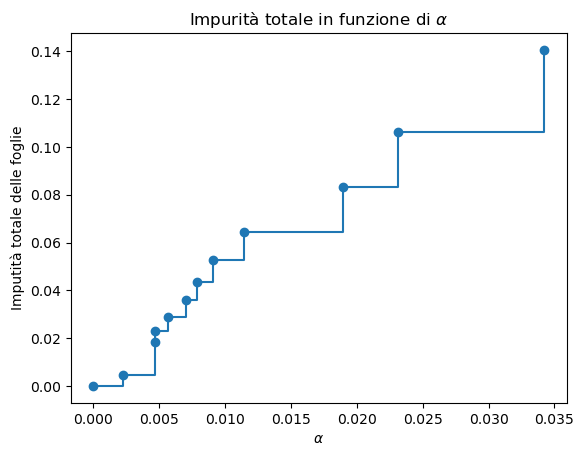

In [153]:
plt.figure()
plt.step(ccp_alphas[:-1], impurities[:-1], 
         marker = "o",
         where = "post")
plt.xlabel(r"$\alpha$")
plt.ylabel("Imputità totale delle foglie")
plt.title(r"Impurità totale in funzione di $\alpha$")
plt.show()

Alleniamo ora un albero per ognuno dei 12 valori di $\alpha$ che portano a un risultato diverso

In [155]:
alberi = []
ccp_alphas = ccp_alphas[:-1]  # togliamo l'ultimo valore di alpha
                              # che da un albero fatto da un solo nodo
for alpha in ccp_alphas:
    albero = DecisionTreeClassifier(random_state = 0,
                                    ccp_alpha = alpha)
    albero.fit(X_train, y_train)
    alberi.append(albero)


Plottiamo ora il numero di nodi e l'altezza dell'albero in funzione di $\alpha$


In [156]:
nodi = [albero.tree_.node_count for albero in alberi]
altezze = [albero.tree_.max_depth for albero in alberi]

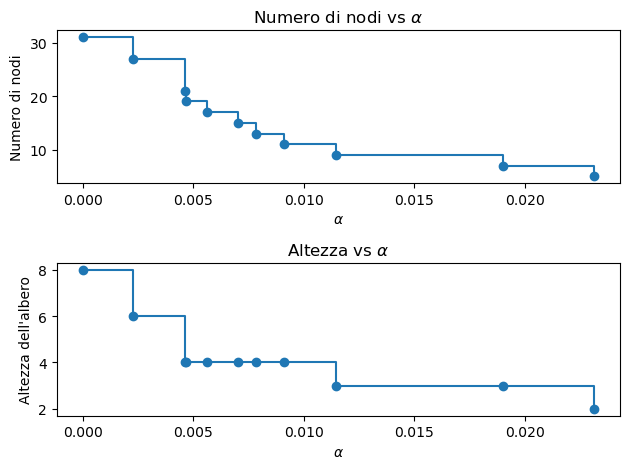

In [157]:
fig, ax = plt.subplots(2, 1)
ax[0].step(ccp_alphas, nodi, marker="o", where="post")
ax[0].set_xlabel(r"$\alpha$")
ax[0].set_ylabel("Numero di nodi")
ax[0].set_title(r"Numero di nodi vs $\alpha$")
ax[1].step(ccp_alphas, altezze, marker="o", where="post")
ax[1].set_xlabel(r"$\alpha$")
ax[1].set_ylabel("Altezza dell'albero")
ax[1].set_title(r"Altezza vs $\alpha$")
fig.tight_layout()

Come ultima cosa valutiamo l'accuratezza (sia su train che su test) in funzione di $\alpha$

In [158]:
train_acc = [albero.score(X_train, y_train) for albero in alberi]
test_acc = [albero.score(X_test, y_test) for albero in alberi]

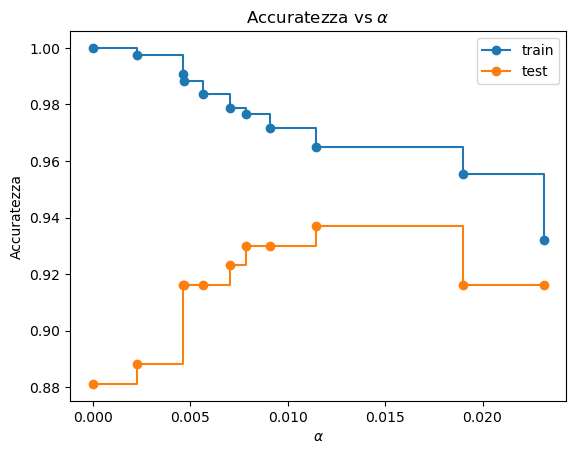

In [159]:
fig, ax = plt.subplots()
ax.set_xlabel(r"$\alpha$")
ax.set_ylabel("Accuratezza")
ax.set_title(r"Accuratezza vs $\alpha$")
ax.step(ccp_alphas, train_acc, marker="o", label="train", where="post")
ax.step(ccp_alphas, test_acc, marker="o", label="test", where="post")
ax.legend()
plt.show()

Come vediamo dal grafico per valori di $\alpha$ fra 0.0 e 0.01 circa l'albero che otteniamo produce overfitting che è massimo in corrispondenza di $\alpha = 0.0$ e si va riducedo all'aumentare. Invece per $\alpha$ superiori a 0.02 circa l'albero otteuto è troppo semplice per avere una buona classificazione.

$\alpha = 0.015$ sembra uno dei valore ottimali per bilanciare copmlessità e accuratezza dell'albero ed evitare l'overfitting.

In [160]:
albero = DecisionTreeClassifier(random_state = 0, ccp_alpha = 0.015)
albero.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.015, random_state=0)

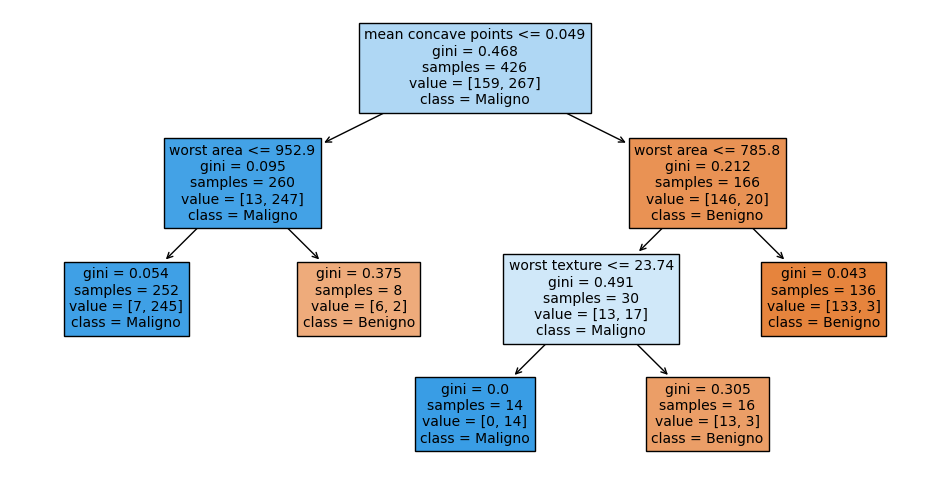

In [161]:
plt.figure(figsize = (12, 6))
plot_tree(albero, 
          filled = True,  # Se colorare i nodi in base alle classi
          feature_names = data.columns,
          class_names = ["Benigno", "Maligno"])
plt.show()

In [162]:
print(f"L'accuratezza di train è {albero.score(X_train, y_train):.3f}")
print(f"L'accuratezza di test è {albero.score(X_test, y_test):.3f}")

L'accuratezza di train è 0.965
L'accuratezza di test è 0.937


Per un problema di regressione si usa invece la classe `DecisionTreeRegressor` che ha una sintassi del tutto simile a quella di `DecisionTreeClassifier`.